In [1]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [5]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [7]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [8]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [9]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


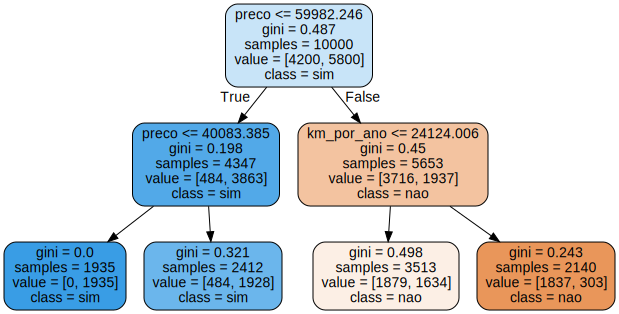

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True,
                rounded=True, class_names=['nao', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [11]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


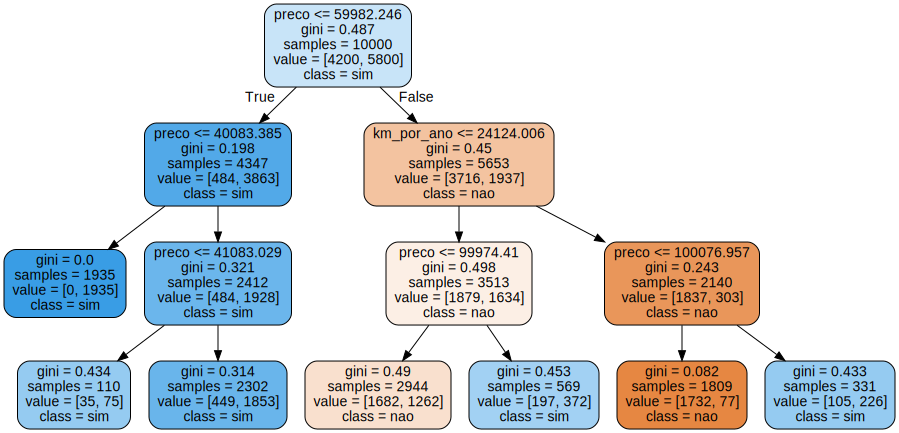

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True,
                rounded=True, class_names=['nao', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [13]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# explorando hiperparametros para uma dimensão

In [14]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


## overfit, ficou perfeito para o treino mas ruim para o teste

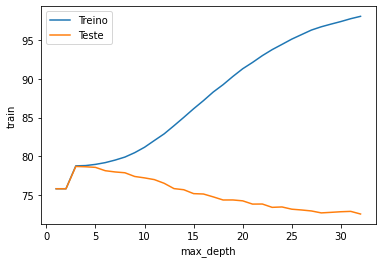

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(['Treino', 'Teste'])

In [16]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiper parametros para duas dimensoes

## rodando com 64x64 parametros, nao é indicado

In [17]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela


def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in range(1, 33):
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 3, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 4, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 5, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 6, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 7, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 8, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 9, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 10, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 11, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 12, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 13, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_

Arvore max_depth = 4, min_samples_leaf = 17, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 18, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 19, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 20, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 21, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 22, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 23, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 24, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 25, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 26, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 27, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 28, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 29, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min

Arvore max_depth = 7, min_samples_leaf = 32, treino = 79.24, teste = 77.94
Arvore max_depth = 8, min_samples_leaf = 1, treino = 79.89, teste = 77.86
Arvore max_depth = 8, min_samples_leaf = 2, treino = 79.79, teste = 77.83
Arvore max_depth = 8, min_samples_leaf = 3, treino = 79.80, teste = 77.59
Arvore max_depth = 8, min_samples_leaf = 4, treino = 79.74, teste = 77.46
Arvore max_depth = 8, min_samples_leaf = 5, treino = 79.70, teste = 77.31
Arvore max_depth = 8, min_samples_leaf = 6, treino = 79.64, teste = 77.30
Arvore max_depth = 8, min_samples_leaf = 7, treino = 79.60, teste = 77.35
Arvore max_depth = 8, min_samples_leaf = 8, treino = 79.58, teste = 77.43
Arvore max_depth = 8, min_samples_leaf = 9, treino = 79.58, teste = 77.55
Arvore max_depth = 8, min_samples_leaf = 10, treino = 79.61, teste = 77.44
Arvore max_depth = 8, min_samples_leaf = 11, treino = 79.62, teste = 77.67
Arvore max_depth = 8, min_samples_leaf = 12, treino = 79.64, teste = 77.48
Arvore max_depth = 8, min_samples_

Arvore max_depth = 11, min_samples_leaf = 14, treino = 80.77, teste = 77.15
Arvore max_depth = 11, min_samples_leaf = 15, treino = 80.74, teste = 77.20
Arvore max_depth = 11, min_samples_leaf = 16, treino = 80.70, teste = 77.33
Arvore max_depth = 11, min_samples_leaf = 17, treino = 80.64, teste = 77.32
Arvore max_depth = 11, min_samples_leaf = 18, treino = 80.61, teste = 77.16
Arvore max_depth = 11, min_samples_leaf = 19, treino = 80.57, teste = 77.11
Arvore max_depth = 11, min_samples_leaf = 20, treino = 80.52, teste = 77.02
Arvore max_depth = 11, min_samples_leaf = 21, treino = 80.52, teste = 76.85
Arvore max_depth = 11, min_samples_leaf = 22, treino = 80.54, teste = 77.01
Arvore max_depth = 11, min_samples_leaf = 23, treino = 80.51, teste = 77.16
Arvore max_depth = 11, min_samples_leaf = 24, treino = 80.48, teste = 77.04
Arvore max_depth = 11, min_samples_leaf = 25, treino = 80.45, teste = 77.12
Arvore max_depth = 11, min_samples_leaf = 26, treino = 80.41, teste = 77.13
Arvore max_d

Arvore max_depth = 14, min_samples_leaf = 27, treino = 80.78, teste = 77.10
Arvore max_depth = 14, min_samples_leaf = 28, treino = 80.72, teste = 77.11
Arvore max_depth = 14, min_samples_leaf = 29, treino = 80.66, teste = 76.94
Arvore max_depth = 14, min_samples_leaf = 30, treino = 80.59, teste = 77.23
Arvore max_depth = 14, min_samples_leaf = 31, treino = 80.53, teste = 77.22
Arvore max_depth = 14, min_samples_leaf = 32, treino = 80.60, teste = 76.69
Arvore max_depth = 15, min_samples_leaf = 1, treino = 86.14, teste = 75.16
Arvore max_depth = 15, min_samples_leaf = 2, treino = 84.90, teste = 74.96
Arvore max_depth = 15, min_samples_leaf = 3, treino = 84.31, teste = 74.80
Arvore max_depth = 15, min_samples_leaf = 4, treino = 83.71, teste = 74.96
Arvore max_depth = 15, min_samples_leaf = 5, treino = 83.29, teste = 75.12
Arvore max_depth = 15, min_samples_leaf = 6, treino = 82.94, teste = 75.31
Arvore max_depth = 15, min_samples_leaf = 7, treino = 82.73, teste = 75.64
Arvore max_depth = 

Arvore max_depth = 18, min_samples_leaf = 8, treino = 83.62, teste = 74.66
Arvore max_depth = 18, min_samples_leaf = 9, treino = 83.40, teste = 75.00
Arvore max_depth = 18, min_samples_leaf = 10, treino = 83.06, teste = 75.14
Arvore max_depth = 18, min_samples_leaf = 11, treino = 82.86, teste = 75.66
Arvore max_depth = 18, min_samples_leaf = 12, treino = 82.70, teste = 75.84
Arvore max_depth = 18, min_samples_leaf = 13, treino = 82.68, teste = 75.85
Arvore max_depth = 18, min_samples_leaf = 14, treino = 82.51, teste = 76.36
Arvore max_depth = 18, min_samples_leaf = 15, treino = 82.37, teste = 76.45
Arvore max_depth = 18, min_samples_leaf = 16, treino = 82.25, teste = 76.44
Arvore max_depth = 18, min_samples_leaf = 17, treino = 82.07, teste = 76.73
Arvore max_depth = 18, min_samples_leaf = 18, treino = 81.93, teste = 76.51
Arvore max_depth = 18, min_samples_leaf = 19, treino = 81.83, teste = 76.46
Arvore max_depth = 18, min_samples_leaf = 20, treino = 81.73, teste = 76.38
Arvore max_dep

Arvore max_depth = 21, min_samples_leaf = 21, treino = 81.88, teste = 76.28
Arvore max_depth = 21, min_samples_leaf = 22, treino = 81.70, teste = 76.65
Arvore max_depth = 21, min_samples_leaf = 23, treino = 81.58, teste = 77.00
Arvore max_depth = 21, min_samples_leaf = 24, treino = 81.50, teste = 76.95
Arvore max_depth = 21, min_samples_leaf = 25, treino = 81.39, teste = 77.12
Arvore max_depth = 21, min_samples_leaf = 26, treino = 81.28, teste = 77.09
Arvore max_depth = 21, min_samples_leaf = 27, treino = 81.21, teste = 77.08
Arvore max_depth = 21, min_samples_leaf = 28, treino = 81.14, teste = 77.06
Arvore max_depth = 21, min_samples_leaf = 29, treino = 81.07, teste = 76.91
Arvore max_depth = 21, min_samples_leaf = 30, treino = 80.98, teste = 77.18
Arvore max_depth = 21, min_samples_leaf = 31, treino = 80.91, teste = 77.06
Arvore max_depth = 21, min_samples_leaf = 32, treino = 80.88, teste = 76.92
Arvore max_depth = 22, min_samples_leaf = 1, treino = 93.02, teste = 73.81
Arvore max_de

Arvore max_depth = 25, min_samples_leaf = 2, treino = 91.35, teste = 72.41
Arvore max_depth = 25, min_samples_leaf = 3, treino = 89.68, teste = 73.10
Arvore max_depth = 25, min_samples_leaf = 4, treino = 87.95, teste = 73.42
Arvore max_depth = 25, min_samples_leaf = 5, treino = 87.08, teste = 73.78
Arvore max_depth = 25, min_samples_leaf = 6, treino = 86.15, teste = 73.89
Arvore max_depth = 25, min_samples_leaf = 7, treino = 85.64, teste = 74.65
Arvore max_depth = 25, min_samples_leaf = 8, treino = 85.19, teste = 73.94
Arvore max_depth = 25, min_samples_leaf = 9, treino = 84.63, teste = 74.70
Arvore max_depth = 25, min_samples_leaf = 10, treino = 84.16, teste = 74.82
Arvore max_depth = 25, min_samples_leaf = 11, treino = 83.72, teste = 75.51
Arvore max_depth = 25, min_samples_leaf = 12, treino = 83.48, teste = 75.46
Arvore max_depth = 25, min_samples_leaf = 13, treino = 83.31, teste = 75.56
Arvore max_depth = 25, min_samples_leaf = 14, treino = 82.95, teste = 76.35
Arvore max_depth = 2

Arvore max_depth = 28, min_samples_leaf = 15, treino = 82.80, teste = 76.23
Arvore max_depth = 28, min_samples_leaf = 16, treino = 82.63, teste = 76.11
Arvore max_depth = 28, min_samples_leaf = 17, treino = 82.43, teste = 76.47
Arvore max_depth = 28, min_samples_leaf = 18, treino = 82.32, teste = 76.39
Arvore max_depth = 28, min_samples_leaf = 19, treino = 82.16, teste = 76.27
Arvore max_depth = 28, min_samples_leaf = 20, treino = 82.02, teste = 76.18
Arvore max_depth = 28, min_samples_leaf = 21, treino = 81.92, teste = 76.32
Arvore max_depth = 28, min_samples_leaf = 22, treino = 81.77, teste = 76.60
Arvore max_depth = 28, min_samples_leaf = 23, treino = 81.65, teste = 77.01
Arvore max_depth = 28, min_samples_leaf = 24, treino = 81.56, teste = 76.93
Arvore max_depth = 28, min_samples_leaf = 25, treino = 81.46, teste = 77.05
Arvore max_depth = 28, min_samples_leaf = 26, treino = 81.36, teste = 77.06
Arvore max_depth = 28, min_samples_leaf = 27, treino = 81.28, teste = 76.99
Arvore max_d

Arvore max_depth = 31, min_samples_leaf = 28, treino = 81.20, teste = 76.98
Arvore max_depth = 31, min_samples_leaf = 29, treino = 81.12, teste = 76.85
Arvore max_depth = 31, min_samples_leaf = 30, treino = 81.01, teste = 77.12
Arvore max_depth = 31, min_samples_leaf = 31, treino = 80.95, teste = 77.01
Arvore max_depth = 31, min_samples_leaf = 32, treino = 80.89, teste = 76.84
Arvore max_depth = 32, min_samples_leaf = 1, treino = 98.10, teste = 72.52
Arvore max_depth = 32, min_samples_leaf = 2, treino = 93.24, teste = 72.25
Arvore max_depth = 32, min_samples_leaf = 3, treino = 91.13, teste = 72.76
Arvore max_depth = 32, min_samples_leaf = 4, treino = 89.03, teste = 73.04
Arvore max_depth = 32, min_samples_leaf = 5, treino = 87.89, teste = 73.59
Arvore max_depth = 32, min_samples_leaf = 6, treino = 86.83, teste = 73.85
Arvore max_depth = 32, min_samples_leaf = 7, treino = 86.19, teste = 74.58
Arvore max_depth = 32, min_samples_leaf = 8, treino = 85.49, teste = 73.79
Arvore max_depth = 3

,max_depth,min_samples_leaf,train,test
0,1,1,75.791169,75.784219
1,1,2,75.791169,75.784219
2,1,3,75.791169,75.784219
3,1,4,75.791169,75.784219
4,1,5,75.791169,75.784219


In [18]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
123,4,28,78.750993,78.672633
126,4,31,78.750993,78.672633
85,3,22,78.750993,78.672633
84,3,21,78.750993,78.672633
83,3,20,78.750993,78.672633


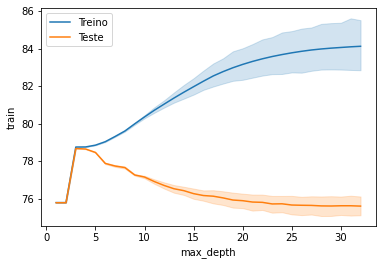

In [19]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(['Treino', 'Teste'])

## a maneira mais indicada é aumentar o valor e diminuir a quantidade. exemplo no min_samples leaf

In [20]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela


def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [32, 64, 128, 256]: ## exemplo aq
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 

Arvore max_depth = 28, min_samples_leaf = 64, treino = 79.79, teste = 77.30
Arvore max_depth = 28, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 28, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 29, min_samples_leaf = 32, treino = 80.89, teste = 76.84
Arvore max_depth = 29, min_samples_leaf = 64, treino = 79.79, teste = 77.30
Arvore max_depth = 29, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 29, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 30, min_samples_leaf = 32, treino = 80.89, teste = 76.84
Arvore max_depth = 30, min_samples_leaf = 64, treino = 79.79, teste = 77.30
Arvore max_depth = 30, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 30, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 31, min_samples_leaf = 32, treino = 80.89, teste = 76.84
Arvore max_depth = 31, min_samples_leaf = 64, treino = 79.79, teste = 77.30
Arvore

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [21]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


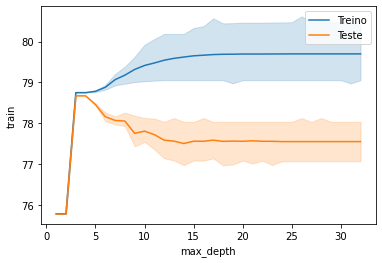

In [22]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(['Treino', 'Teste'])

In [23]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


<AxesSubplot:>

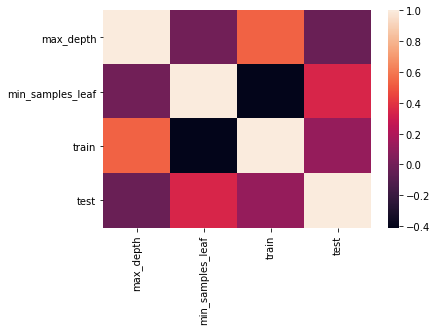

In [24]:
sns.heatmap(corr)

array([[<AxesSubplot:xlabel='max_depth', ylabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>,
        <AxesSubplot:xlabel='train', ylabel='max_depth'>,
        <AxesSubplot:xlabel='test', ylabel='max_depth'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='train', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='test', ylabel='min_samples_leaf'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='train'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='train'>,
        <AxesSubplot:xlabel='train', ylabel='train'>,
        <AxesSubplot:xlabel='test', ylabel='train'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='test'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='test'>,
        <AxesSubplot:xlabel='train', ylabel='test'>,
        <AxesSubplot:xlabel='test', ylabel='test'>]], dtype=object)

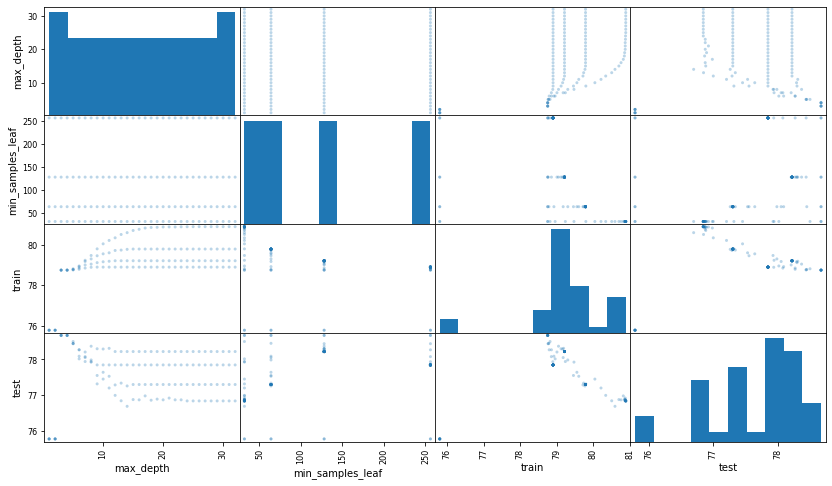

In [25]:
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

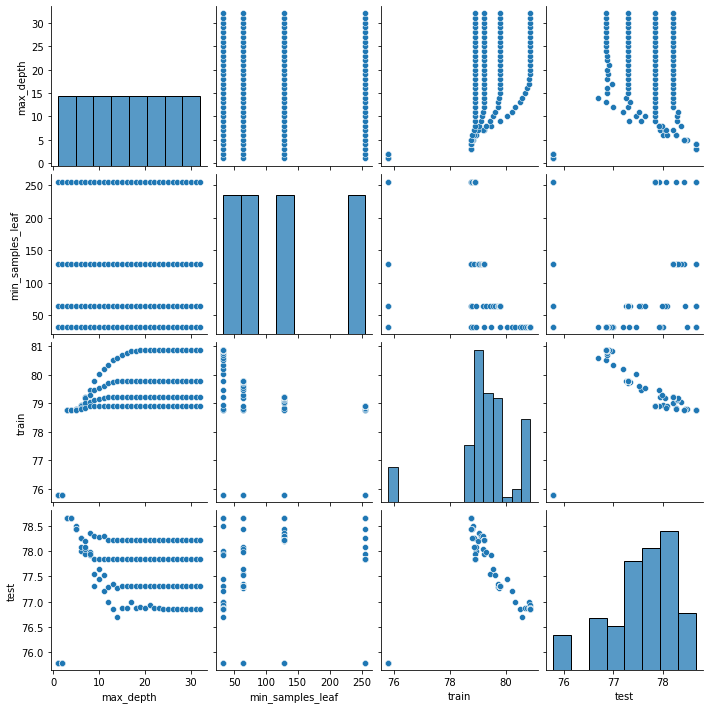

In [26]:
sns.pairplot(resultados)

<AxesSubplot:>

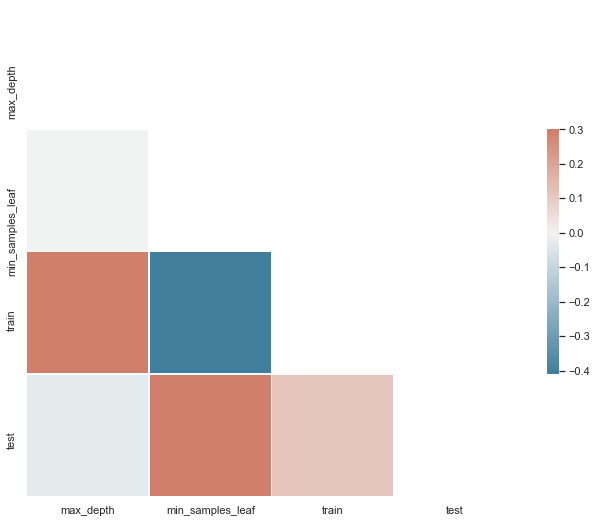

In [27]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [128, 192, 256, 512]: ## exemplo aq
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', "train", "test"])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.53, teste = 77.50
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_d

Arvore max_depth = 28, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 28, min_samples_leaf = 192, treino = 79.01, teste = 78.05
Arvore max_depth = 28, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 28, min_samples_leaf = 512, treino = 77.53, teste = 77.50
Arvore max_depth = 29, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 29, min_samples_leaf = 192, treino = 79.01, teste = 78.05
Arvore max_depth = 29, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 29, min_samples_leaf = 512, treino = 77.53, teste = 77.50
Arvore max_depth = 30, min_samples_leaf = 128, treino = 79.21, teste = 78.22
Arvore max_depth = 30, min_samples_leaf = 192, treino = 79.01, teste = 78.05
Arvore max_depth = 30, min_samples_leaf = 256, treino = 78.90, teste = 77.85
Arvore max_depth = 30, min_samples_leaf = 512, treino = 77.53, teste = 77.50
Arvore max_depth = 31, min_samples_leaf = 128, treino = 79.21, teste = 78.22

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


<AxesSubplot:>

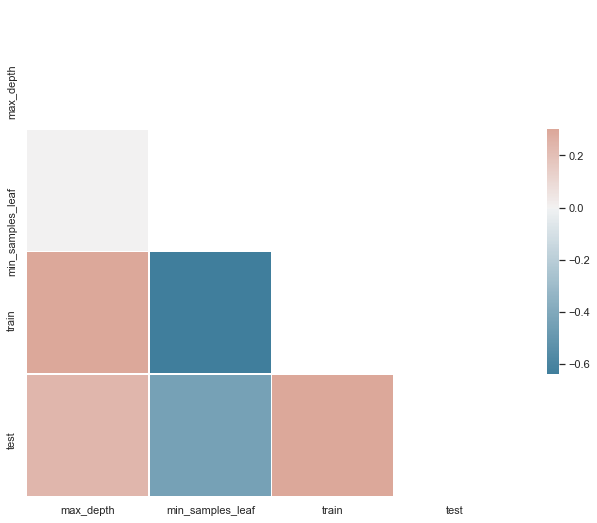

In [29]:
corr = resultados.corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values('test', ascending=False).head()


,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# explorando hiper parametros de tres dimensoes

In [31]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split = min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
#   print("Arvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, min_samples_split, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela


def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 62, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns = ["max_depth", 'min_samples_leaf', 'min_samples_split', "train", "test", 'fit_time', 'score_time'])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.003690,0.001197
1,1,32,62,75.791169,75.784219,0.003492,0.001198
2,1,32,128,75.791169,75.784219,0.003596,0.001094
3,1,32,256,75.791169,75.784219,0.003489,0.001082
4,1,64,32,75.791169,75.784219,0.003591,0.001098


<AxesSubplot:>

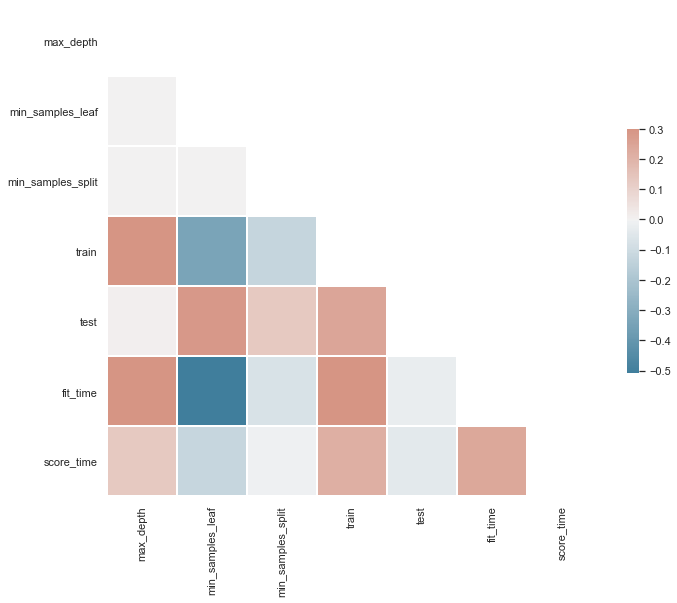

In [32]:
corr = resultados.corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [33]:
resultados.sort_values('test', ascending=False).head()


,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.007107,0.001097
48,4,32,32,78.750993,78.672633,0.007305,0.001300
34,3,32,128,78.750993,78.672633,0.006291,0.001109
35,3,32,256,78.750993,78.672633,0.006301,0.001205
36,3,64,32,78.750993,78.672633,0.006213,0.001190


# explorando espaço de hiper parametros com grindsearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006238,0.000515,0.001293,0.000460,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.006478,0.000501,0.001201,0.000408,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.006234,0.000510,0.001197,0.000399,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.006383,0.000484,0.001201,0.000397,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.006301,0.000466,0.001204,0.000407,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [35]:
print(busca.best_params_)
print(busca.best_score_ * 100)
melhor = busca.best_estimator_
print(busca.best_estimator_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332
DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


In [36]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem, pois estará sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar)
print('Accuracy dos dados foi {}%.'.format(accuracy*100))

Accuracy dos dados foi 78.75%.


# como ter uma estimativa sem ter vicio nos dados

## no caso de crossvalidation com busca em hyperparametros, fazemos uma nova validação cruzada, cujo o nome é: nested cross validation

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)
print(scores)

[nan nan nan nan nan nan nan nan nan nan]


C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1288, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\Elvis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 807, in evaluate_candidates
    (spli

## infelizmente como o Pandas nao suporta nested cross validation com group k fold, não conseguimos prever o resultado do modelo

In [38]:
# usando um kfold normal.

from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005984,0.000630,0.001596,0.000489,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.005585,0.000489,0.001396,0.000489,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.005585,0.000489,0.001197,0.000399,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.005784,0.000399,0.001197,0.000399,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.005585,0.000489,0.001396,0.000489,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle=True))
print(scores)

[0.7895 0.7825 0.7905 0.7715 0.7995]


In [40]:
def imprime_score(scores):
    media = scores.mean() * 100
    desvio = scores.std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [41]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [42]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


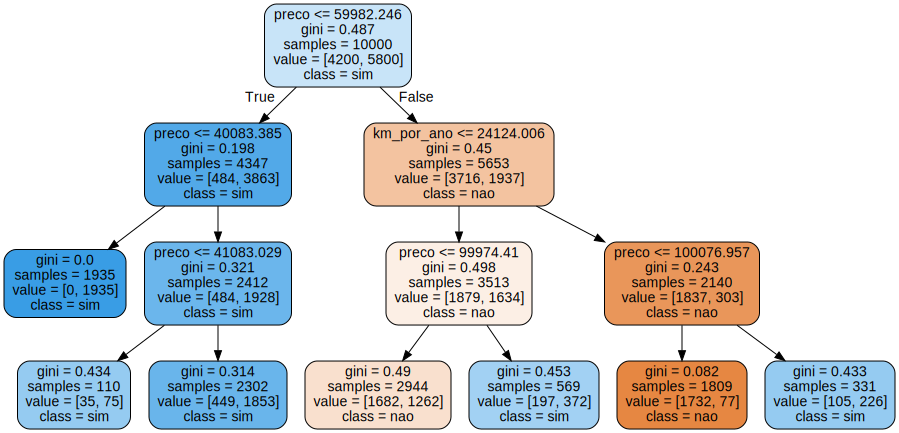

In [43]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True,
                rounded=True, class_names=['nao', 'sim'], feature_names=features)

graph = graphviz.Source(dot_data)
graph